In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave


ORIGINAL PLANT SOUND 

Number of channels: 1
Sample width (bytes): 2
Frame rate (samples per second): 500000
Number of frames: 1001
Compression type: NONE
Compression name: not compressed
Recording time (s): 0.002002


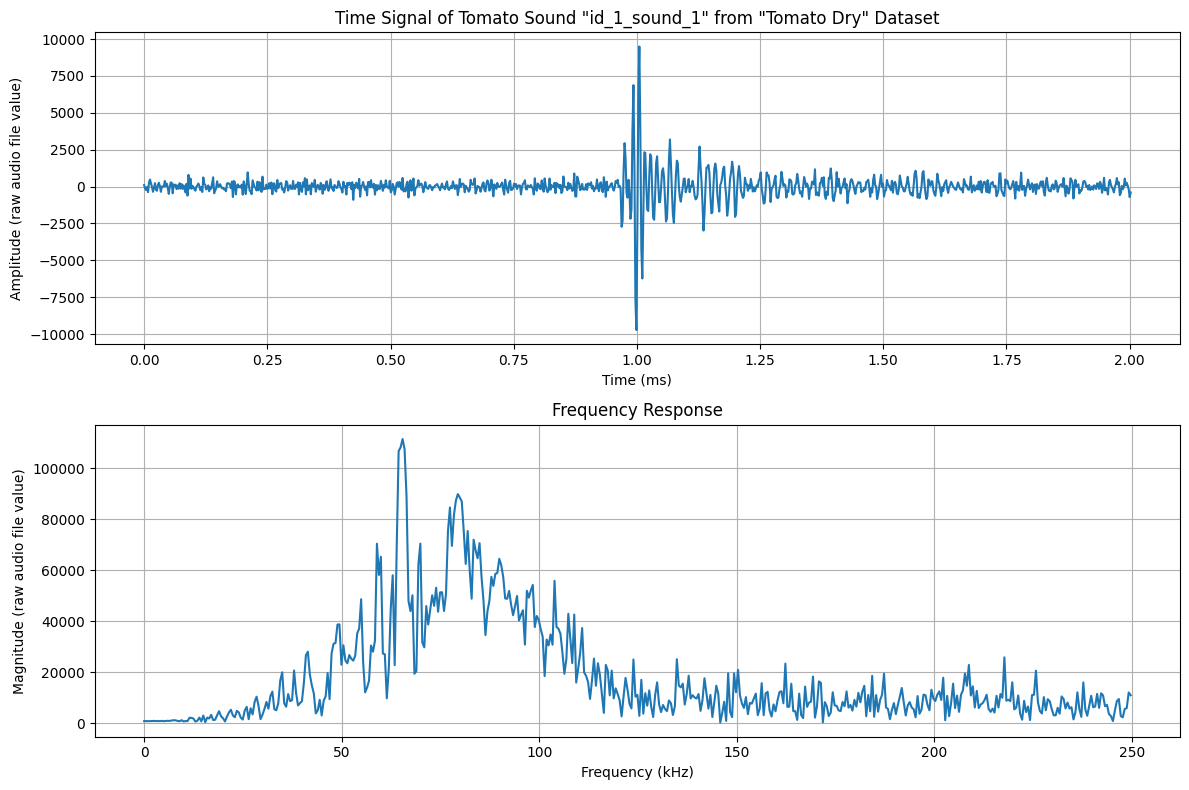

In [2]:
# Open the .wav file
wav_file = wave.open('C:/Users/abdel/Documents/GitHub/year4_project/STM32_POC/raw_sound_generation/wavFiles/id_1_sound_1.wav', 'r')

# Print the properties of the .wav file
print("Number of channels:", wav_file.getnchannels())
print("Sample width (bytes):", wav_file.getsampwidth())
print("Frame rate (samples per second):", wav_file.getframerate())
print("Number of frames:", wav_file.getnframes())
print("Compression type:", wav_file.getcomptype())
print("Compression name:", wav_file.getcompname())
# Calculate the recording time
recording_time = wav_file.getnframes() / wav_file.getframerate()
print("Recording time (s):", recording_time)

# Extract Raw Audio from Wav File
signal = wav_file.readframes(-1) #-1 means read all frames
signal = np.frombuffer(signal, dtype='int16')

# Compute the FFT and the frequency axis
fft_result = np.fft.rfft(signal)
sample_rate = 500000
freq = np.fft.rfftfreq(len(signal), 1/sample_rate)

# # Find the peak frequency
# peak_freq = freq[np.argmax(np.abs(fft_result))]

# print("Peak frequency (Hz):", peak_freq)

# Get the sound wave time array
time = np.linspace(0., len(signal) / wav_file.getframerate(), num=len(signal))* 10**3 # in ms

# Create a figure with two subplots
# fig, axs = plt.subplots(2, 1, figsize=(15, 10))
plt.figure(figsize=(12, 8))  # Adjust the numbers as needed

# Plot the signal
plt.subplot(2, 1, 1)
# Plot the audio signal in the first subplot
plt.plot(time, signal)
plt.title('Time Signal of Tomato Sound "id_1_sound_1" from "Tomato Dry" Dataset')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (raw audio file value)')
plt.grid()

plt.subplot(2, 1, 2)
# Plot the frequency response in the second subplot
plt.plot(freq/1000, np.abs(fft_result))
plt.title('Frequency Response')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude (raw audio file value)')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

ORIGINAL PLANT SOUND THROUGH MY SYSTEM (STM32 AND LOW-COST SOUND SENSOR)

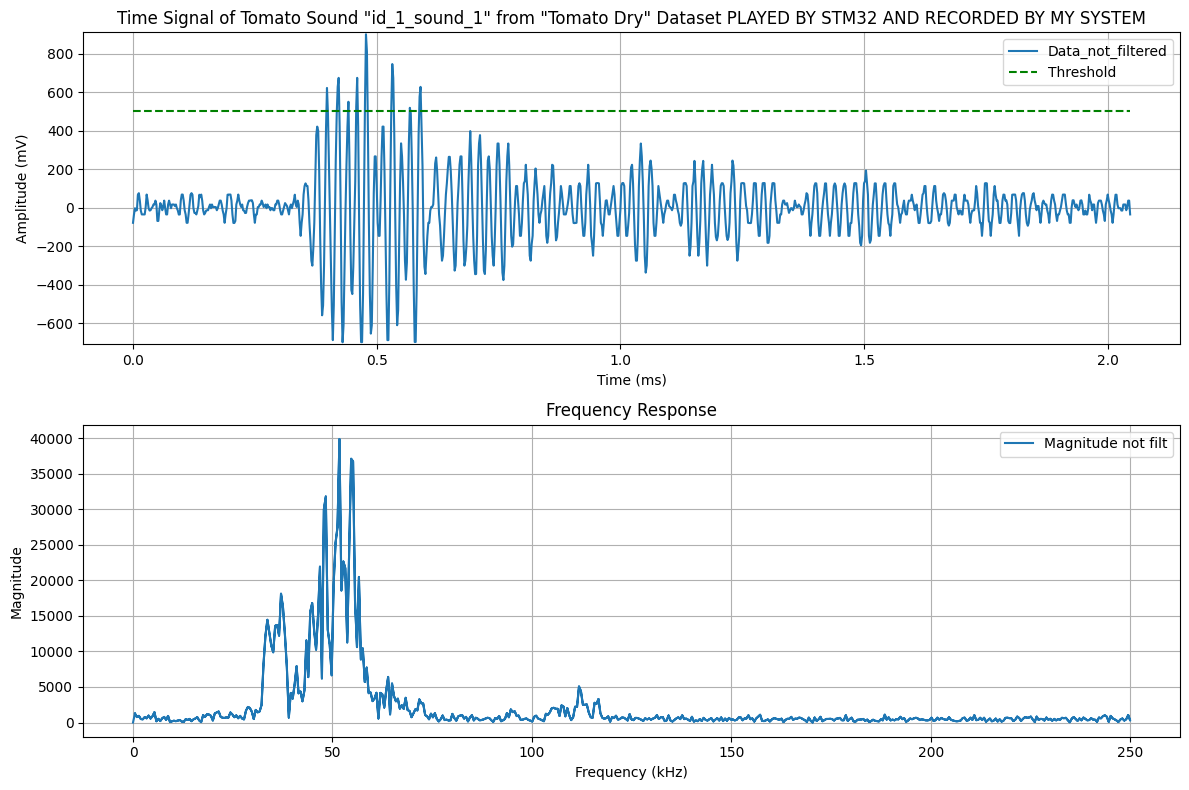

In [3]:
# Load the data from the CSV file
#num = '7'
filename = 'C:/Users/abdel/Documents/GitHub/year4_project/plantSoundDetection/PSD_v7/trig6_stm32sound.csv'
#filename = 'Triggered_plant/trig' + num + '.csv' #DONT FOGET TO CHANGE PATH FOR PLANT AND NOT PLANT

data = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=0)
thresh = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=1)

data = data *3300/4095
thresh = thresh *3300/4095

fft_result = np.fft.fft(data)
# Compute the frequency axis (assuming a sample rate of 470 kHz)
sample_rate = 500000
freq = np.fft.fftfreq(len(data), 1/sample_rate)

min_data = np.min(data)
max_data = np.max(data)

num_samples = len(data)

# Generate time axis
time = (np.arange(num_samples) / sample_rate) * 10**3  # Convert to microseconds

# Create a figure
# Create a figure with a specific size (width, height)
plt.figure(figsize=(12, 8))  # Adjust the numbers as needed

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(time, data, label='Data_not_filtered')
#plt.plot(datafilt, label='Data_filtered',color='red')
plt.plot(time, thresh, label='Threshold', linestyle='--', color='green')
#plt.ylim([-2050, 2050])  # Set the limits of the y-axis
plt.ylim([min_data-10, max_data+10])
plt.title('Time Signal of Tomato Sound "id_1_sound_1" from "Tomato Dry" Dataset PLAYED BY STM32 AND RECORDED BY MY SYSTEM')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid

# Plot the frequency response
plt.subplot(2, 1, 2)
#plt.plot(freq_values[:1023], magnitudenotfilt[:1023], label='Magnitude not filtered')
plt.plot(np.abs(freq)/1000, np.abs(fft_result), label='Magnitude not filt')
plt.title('Frequency Response')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid


# # Adjust the layout and display the plots
plt.tight_layout()
plt.show()

REAL PLANT SOUND DETECTED

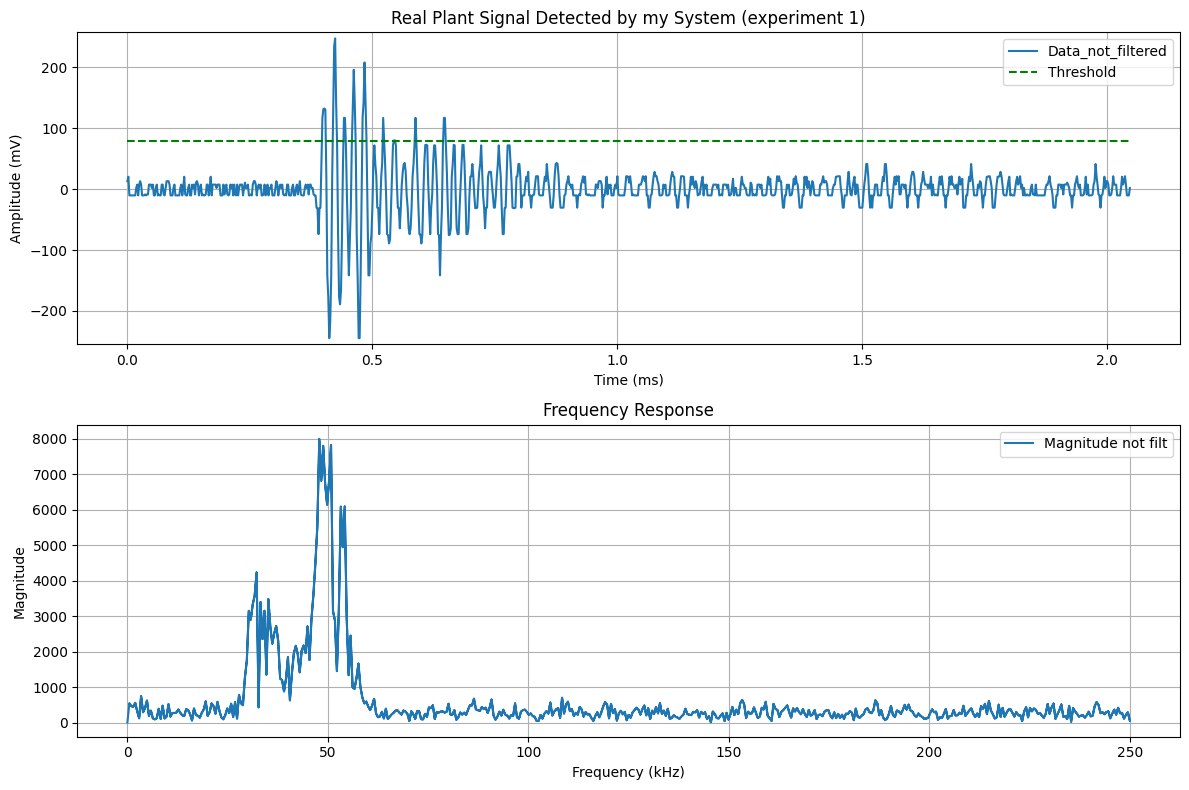

In [8]:

# Load the data from the CSV file
#num = '7' #I think & is the best result I got
filename = 'C:/Users/abdel/Documents/GitHub/year4_project/plantSoundDetection/PSD_v7/Triggered_plant_exp1_results/trig7.csv'
#filename = 'Triggered_plant/trig' + num + '.csv' #DONT FOGET TO CHANGE PATH FOR PLANT AND NOT PLANT

data = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=0)
thresh = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=1)

data = data *3300/4095
thresh = thresh *3300/4095

fft_result = np.fft.fft(data)
# Compute the frequency axis (assuming a sample rate of 470 kHz)
sample_rate = 500000
freq = np.fft.fftfreq(len(data), 1/sample_rate)

min_data = np.min(data)
max_data = np.max(data)

num_samples = len(data)

# Generate time axis
time = (np.arange(num_samples) / sample_rate) * 10**3  # Convert to microseconds

# Create a figure
# Create a figure with a specific size (width, height)
plt.figure(figsize=(12, 8))  # Adjust the numbers as needed

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(time, data, label='Data_not_filtered')
#plt.plot(datafilt, label='Data_filtered',color='red')
plt.plot(time, thresh, label='Threshold', linestyle='--', color='green')
#plt.ylim([-2050, 2050])  # Set the limits of the y-axis
plt.ylim([min_data-10, max_data+10])
plt.title('Tomato Plant Ultrasound Detected by my System (experiment 1)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid

# Plot the frequency response
plt.subplot(2, 1, 2)
#plt.plot(freq_values[:1023], magnitudenotfilt[:1023], label='Magnitude not filtered')
plt.plot(np.abs(freq)/1000, np.abs(fft_result), label='Magnitude not filt')
plt.title('Frequency Response')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid


# # Adjust the layout and display the plots
plt.tight_layout()
plt.show()

False detections

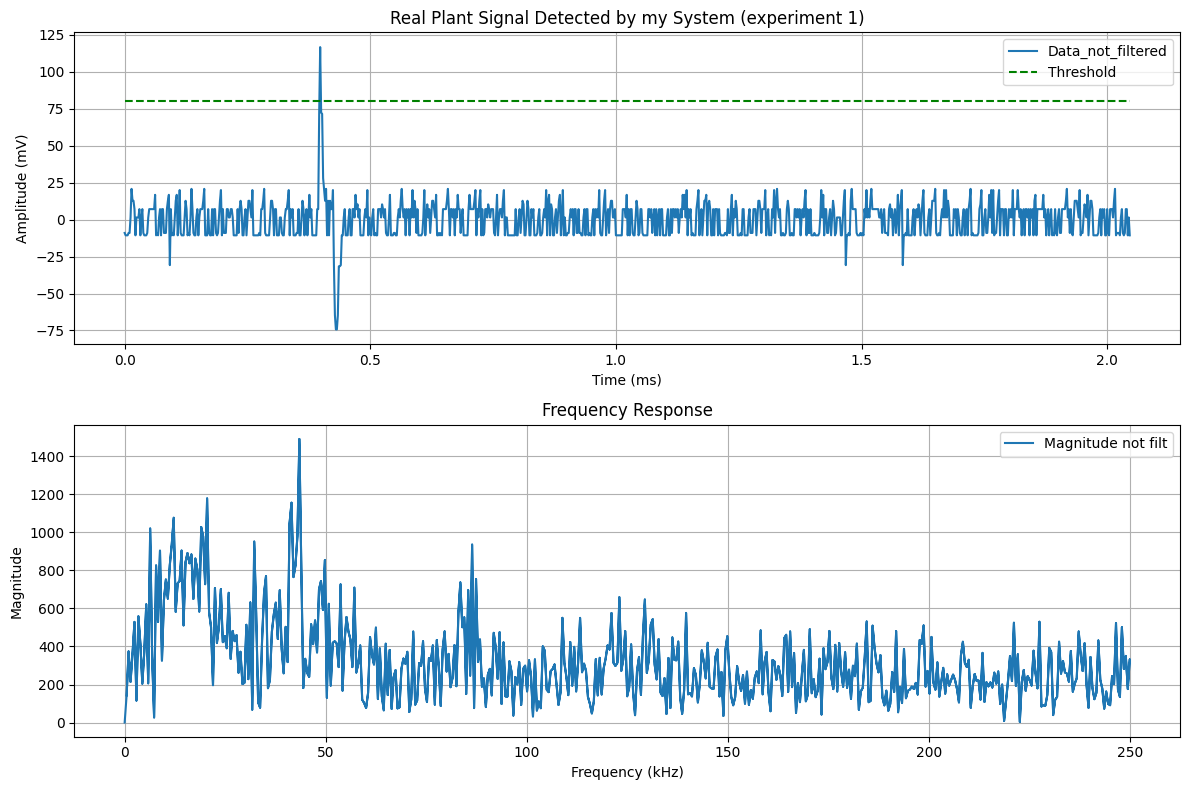

In [4]:

# Load the data from the CSV file
#num = '7'
filename = 'C:/Users/abdel/Documents/GitHub/year4_project/plantSoundDetection/PSD_v7/Triggered_plant_exp1_results/trig87.csv'
#filename = 'Triggered_plant/trig' + num + '.csv' #DONT FOGET TO CHANGE PATH FOR PLANT AND NOT PLANT

data = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=0)
thresh = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=1)

data = data *3300/4095
thresh = thresh *3300/4095

fft_result = np.fft.fft(data)
# Compute the frequency axis (assuming a sample rate of 470 kHz)
sample_rate = 500000
freq = np.fft.fftfreq(len(data), 1/sample_rate)

min_data = np.min(data)
max_data = np.max(data)

num_samples = len(data)

# Generate time axis
time = (np.arange(num_samples) / sample_rate) * 10**3  # Convert to microseconds

# Create a figure
# Create a figure with a specific size (width, height)
plt.figure(figsize=(12, 8))  # Adjust the numbers as needed

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(time, data, label='Data_not_filtered')
#plt.plot(datafilt, label='Data_filtered',color='red')
plt.plot(time, thresh, label='Threshold', linestyle='--', color='green')
#plt.ylim([-2050, 2050])  # Set the limits of the y-axis
plt.ylim([min_data-10, max_data+10])
plt.title('Real Plant Signal Detected by my System (experiment 1)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid

# Plot the frequency response
plt.subplot(2, 1, 2)
#plt.plot(freq_values[:1023], magnitudenotfilt[:1023], label='Magnitude not filtered')
plt.plot(np.abs(freq)/1000, np.abs(fft_result), label='Magnitude not filt')
plt.title('Frequency Response')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid


# # Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [5]:
absolute_max_mV = np.max(np.abs(data))
# print('absolute max:', absolute_max)
#absolute_max_mV = absolute_max * 3300 / 4095
print('absolute max mV:', absolute_max_mV)
max_freq= np.max(np.abs(fft_result))
print('max freq mag:', max_freq)
freq_index_max = np.argmax(np.abs(fft_result))
print('freq index max:', freq_index_max)
freq_max= np.abs(freq[freq_index_max])
print('freq max:', freq_max)
pre_amp_max_mV = absolute_max_mV / 150
print('pre amp max mV:', pre_amp_max_mV)
# use mic sensitivity at max frequ to find sound pressure level
# sensitivity at 48kHz is -42dB + 10 dB so 25.118864 mV/Pa
sensitivity = 25.118864
sound_pressure = pre_amp_max_mV / sensitivity
print('sound pressure:', sound_pressure, 'Pa')
sound_pressure_dBSPL = 20 * np.log10(sound_pressure / 20e-6)
print('sound pressure level dB SPL:', sound_pressure_dBSPL, 'dB SPL')


absolute max mV: 116.68455252747255
max freq mag: 1490.6567111435386
freq index max: 89
freq max: 43457.03125
pre amp max mV: 0.7778970168498169
sound pressure: 0.03096863842448516 Pa
sound pressure level dB SPL: 63.797842316082935 dB SPL


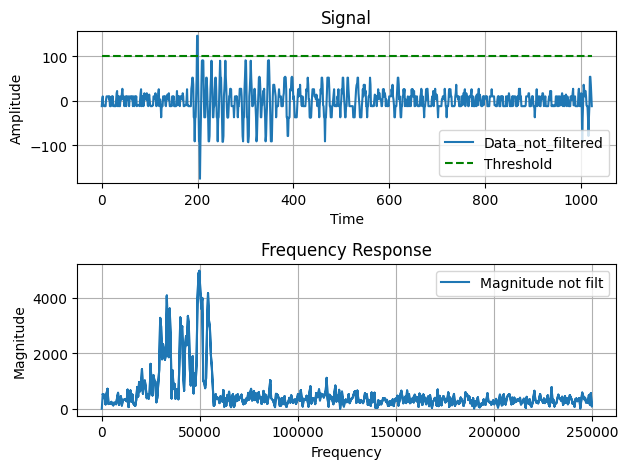

In [6]:
# Load the data from the CSV file
#num = '7'
filename = 'C:/Users/abdel/Documents/GitHub/year4_project/plantSoundDetection/PSD_v7/Triggered_plant_exp1_results/trig5.csv'
#filename = 'Triggered_plant/trig' + num + '.csv' #DONT FOGET TO CHANGE PATH FOR PLANT AND NOT PLANT

data = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=0)
thresh = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=1)

fft_result = np.fft.fft(data)
# Compute the frequency axis (assuming a sample rate of 470 kHz)
sample_rate = 500000
freq = np.fft.fftfreq(len(data), 1/sample_rate)

min_data = np.min(data)
max_data = np.max(data)


# Create a figure
plt.figure()

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(data, label='Data_not_filtered')
#plt.plot(datafilt, label='Data_filtered',color='red')
plt.plot(thresh, label='Threshold', linestyle='--', color='green')
#plt.ylim([-2050, 2050])  # Set the limits of the y-axis
plt.ylim([min_data-10, max_data+10])
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid

# Plot the frequency response
plt.subplot(2, 1, 2)
#plt.plot(freq_values[:1023], magnitudenotfilt[:1023], label='Magnitude not filtered')
plt.plot(np.abs(freq), np.abs(fft_result), label='Magnitude not filt')
plt.title('Frequency Response')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid


# # Adjust the layout and display the plots
plt.tight_layout()
plt.show()